样例说明：题目来自于机器学习竞赛网站kaggle：
https://www.kaggle.com/c/titanic/data
一、数据收集
数据收集无需要多讲，直接从这里下载：
https://www.kaggle.com/c/titanic/data
数据集的初步了解，kaggle中对数据集有明确的说明，为方便大家，在此作个简要的中文说明。想要学习机器学习的朋友，最好还是尝试阅读英文的资料。
此数据集是描述在泰坦尼克号中乘客的信息以及乘客最终是否幸存下来。


变量及含义：
survival，是否幸存，0为否，1为是
pclass
 ，票的等级，1代表一等仓，2代表二等仓，3代表三等仓
sex
 ， 性别，male：男性，female：女性
Age，年龄
sibsp，兄弟姐妹或配偶同行的数量
parch，父母或子女同行的数量
ticket，票号
fare，票价
cabin，客仓号
embarked，登船口
数据，请到如下链接下载或者到kaggle下载。

## 数据预处理
数据预处理使用pandas，数据预处理代码如下：

In [6]:
# -*- coding:utf-8 -*-
import pandas as pd   #导入pandas数据分析库，用于数据预处理
import numpy as np
train=pd.read_csv('F:\\sklearn\\train.csv')
def yuchuli():
    #train.head(5)                 #查看前5行数据
    #train.describe()              #输出相关统计量
    train['Age']=train['Age'].fillna(train['Age'].median())  #用均值填充 缺失值
    #train.describe()               #输出相关统计量
    #train['Sex'].unique()          #查看弄个特征有多少个不同的取值#array(['male','femaldtype=object)
    train.loc[train['Sex']=="male",'Sex']=0     #将Sex特征向量的male取值设置为0
    train.loc[train['Sex']=="female",'Sex']=1    #将Sex特征向量的female取值设置为1
    #train.head()
    #train['Embarked'].unique()     #array(['S', 'C', 'Q', nan]
    #train[train['Embarked']=='S'].count()  #644个，比例特别巨大
    #train[train['Embarked'].isnull()]  #2个空值
    train['Embarked']=train['Embarked'].fillna('S')  #用众数补全空值
    #train['Embarked'].describe()
    train.loc[train['Embarked']=='S','Embarked']=0
    train.loc[train['Embarked']=='C','Embarked']=1
    train.loc[train['Embarked']=='Q','Embarked']=2
    #train.head(6)
    return train

# 构建模型

## 模型1：线性回归
    线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，运用十分广泛。其表达形式为y = w'x+e，e为误差服从均值为0的正态分布。
    回归分析中，只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为多元线性回归分析。

线性回归模型，代码如下：

In [7]:
#线性回归
from sklearn.linear_model import LinearRegression
#交叉验证:将训练数据集分成3份，对这三份进行交叉验证，比如使用1，2样本测试，3号样本验证
#对最后得到得数据取平均值
from sklearn.cross_validation import KFold
def xianxing_huigui():
    predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']  #选取一些特征
    LR=LinearRegression()    #创建线性回归模型
    kf=KFold(train.shape[0],n_folds=3,random_state=1)   #交叉验证，等分出3等分，两两交叉验证
    predictions=[]  #用于保存预测标签结果集
    for train1,test in kf: #进行交叉验证
        train_predictors=(train[predictors].iloc[train1,:])    #拿到特征向量
        train_target=train['Survived'].iloc[train1]           #拿到标签
        LR.fit(train_predictors,train_target)           #拟合模型
        test_predictions=LR.predict(train[predictors].iloc[test,:])   #拿预测数据去预测得到预测标签
        predictions.append(test_predictions)
    #线性回归
    predictions=np.concatenate(predictions,axis=0)
    #将0到1之间的区间值，变成具体的是否被获救，1代表被获救
    predictions[predictions>0.5]=1
    predictions[predictions<=0.5]=0
    accuracy=sum(predictions[predictions==train['Survived']])/len(predictions)   #获得准确率
    return accuracy   #返回准确率

train=yuchuli()
acc=xianxing_huigui()
print(acc)

0.261503928171


## 模型2：
逻辑回归：http://blog.csdn.net/pakko/article/details/37878837
逻辑回归模型，代码如下

In [11]:
#使用逻辑回归算法，它虽然是回归算法，但是一般都用来分类
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
def  Logistic():
    alg=LogisticRegression(random_state=1)
    predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']  #选取一些特征
    scores=cross_validation.cross_val_score(alg,train[predictors],train['Survived'],cv=3)
    #注意，逻辑回归和线性回归得到的结果类型不一样，逻辑回归是概率值，线性回归是[0,1]区间的数值
    return scores.mean() #返回准确率

acc=Logistic()
print(acc)

0.787878787879


模型3：
随机森林：在机器学习中，随机森林是一个包含多个决策树的分类器， 并且其输出的类别是由个别树输出的类别的众数而定。
随机森林参数介绍
1、随机森林框架参数：
　1) n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，计算量会太大，并且n_estimators到一定的数量后，再增大n_estimators获得的模型提升会很小，所以一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和learning_rate一起考虑。

　2) oob_score :即是否采用袋外样本来评估模型的好坏。默认识False。个人推荐设置为True，因为袋外分数反应了一个模型拟合后的泛化能力。

　3) criterion: 即CART树做划分时对特征的评价标准。分类模型和回归模型的损失函数是不一样的。分类RF对应的CART分类树默认是基尼系数gini,另一个可选择的标准是信息增益。回归RF对应的CART回归树默认是均方差mse，另一个可以选择的标准是绝对值差mae。一般来说选择默认的标准就已经很好的。
2、随机森林决策树参数
1) RF划分时考虑的最大特征数max_features: 可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；
2) 决策树最大深度max_depth
3) 内部节点再划分所需最小样本数min_samples_split
4) 叶子节点最少样本数min_samples_leaf
5）叶子节点最小的样本权重和min_weight_fraction_leaf
6) 最大叶子节点数max_leaf_nodes
7) 节点划分最小不纯度min_impurity_split:
上面决策树参数中最重要的包括最大特征数max_features， 最大深度max_depth， 内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf。


## 随机深林模型，代码如下：
#随机森林

准确率： 0.862071317488

Model Report
Accuracy : 0.8429
AUC Score (Train): 0.900010
CV Score : Mean - 0.8620713 | Std - 0.02956678 | Min - 0.8151836 | Max - 0.9049689


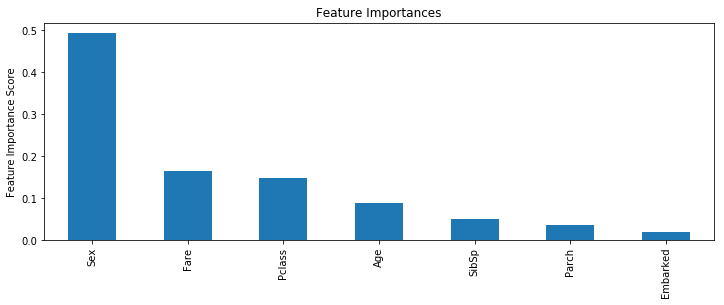

In [25]:
#1.样本是随机的，有放回的取样  2.特征的选择也是随机的，防止过拟合  3.多颗决策树，取平均值
from sklearn import cross_validation
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV      #用于进行梯度下降调参
#选中一些特征
predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
#random_state=1表示此处代码多运行几次得到的随机值都是一样的，如果不设置，两次执行的随机值是不一样的
#n_estimators指定有多少颗决策树，树的分裂的条件是:min_samples_split代表样本不停的分裂，某一个节点上的样本如果只有2个了
#就不再继续分裂了，min_samples_leaf是控制叶子节点的最小个数


#进行梯度下降调参，首先调n_estimators(树的个数)结果为{'n_estimators': 26},0.8575893301684556)

#param_test={'n_estimators':list(range(10,100,2))}
#gsearch=GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,\
#                    min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),\
#                     param_grid = param_test, scoring='roc_auc',cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_


#进行梯度下降的调参,调max_depth,结果是5     # 0.8600357350447354
#param_test={'max_depth':list(range(3,14,1))}
#gsearch=GridSearchCV(estimator = RandomForestClassifier(n_estimators=26,\
#                    min_samples_split=100,min_samples_leaf=20,max_features='sqrt' ,random_state=10),\
#                     param_grid = param_test, scoring='roc_auc',cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

#进行梯度下降的调参,调min_samples_split,结果{'min_samples_split': 15}, 0.8551051934258219
#param_test={'min_samples_split':list(range(15,50,2))}
#gsearch=GridSearchCV(estimator = RandomForestClassifier(n_estimators=26,\
#                    max_depth=5,min_samples_leaf=20,max_features='sqrt' ,random_state=10),\
#                     param_grid = param_test, scoring='roc_auc',cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

 
#进行梯度下降的调参,调min_samples_leaf {'min_samples_leaf': 4},0.8696662429496531
#param_test={'min_samples_leaf':list(range(1,15,1))}
#gsearch=GridSearchCV(estimator = RandomForestClassifier(n_estimators=26,\
#                    max_depth=5,min_samples_split=15,max_features='sqrt' ,random_state=10),\
#                     param_grid = param_test, scoring='roc_auc',cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_
alg = RandomForestClassifier(random_state=1,n_estimators=26,max_depth=5,min_samples_split=15,min_samples_leaf=4)#进行交叉验证
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Survived'])

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Perform cross-validation:
    if performCV:
        kf = cross_validation.KFold(train.shape[0],n_folds=cv_folds,random_state=1)
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Survived'], cv=kf, scoring='roc_auc')

    #Print model report:
    print("准确率：",cv_score.mean())
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Survived'], dtrain_predprob))

    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
modelfit(alg, train, predictors)

#def RandomForest():
#    alg = RandomForestClassifier(random_state=1,n_estimators=26,max_depth=5,min_samples_split=15,min_samples_leaf=4)#进行交叉验证
#    kf = cross_validation.KFold(train.shape[0],n_folds=3,random_state=1)
#    scores = cross_validation.cross_val_score(alg,train[predictors],train["Survived"],cv=kf)
#    print (scores.mean())

## 模型4：
梯度提升具体可参考http://www.jianshu.com/p/005a4e6ac775
梯度提升模型：

0.860990099791

Model Report
Accuracy : 0.9416
AUC Score (Train): 0.989585
CV Score : Mean - 0.8609901 | Std - 0.02926617 | Min - 0.8245056 | Max - 0.8977226


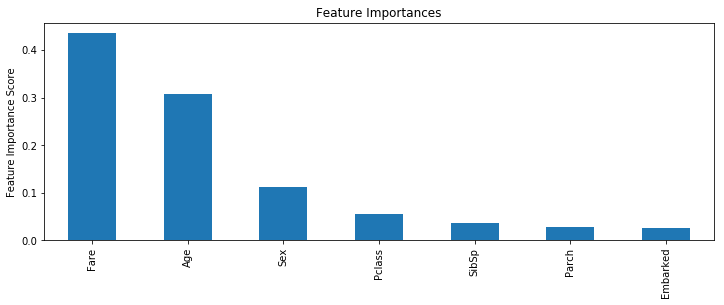

In [26]:
#梯度提升模型
from sklearn import cross_validation
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#进行梯度下降的调参,首先调n_estimators,结果是88 #.086
#para_test = {'n_estimators':list(range(20,100,2))}
#gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,min_samples_split=300,min_samples_leaf=20,max_features='sqrt',subsample=0.8,random_state=10),param_grid=para_test,scoring='roc_auc',iid=False,cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.best_params_,gsearch.best_score_

#进行梯度下降的调参,调max_depth,结果是11     #0.87496181636160275
#para_test = {'max_depth':list(range(5,12,1))}
#gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=88,min_samples_leaf=20,max_features='sqrt',subsample=0.8,random_state=10),param_grid=para_test,scoring='roc_auc',iid=False,cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.best_params_,gsearch.best_score_

    
#进行梯度下降的调参,调min_samples_split,结果是20  #0.87
#para_test = {'min_samples_split':list(range(20,35,1))}
#gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=88,min_samples_leaf=20,max_depth=11,max_features='sqrt',subsample=0.8,random_state=10),param_grid=para_test,scoring='roc_auc',iid=False,cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.best_params_,gsearch.best_score_

#进行梯度下降的调参,调min_samples_leaf,结果是14  #0.87
#para_test = {'min_samples_leaf':list(range(1,15,1))}
#gsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=88,min_samples_split=20,max_depth=11,max_features='sqrt',subsample=0.8,random_state=10),param_grid=para_test,scoring='roc_auc',iid=False,cv=5)
#gsearch.fit(train[predictors],train["Survived"])
#gsearch.best_params_,gsearch.best_score_

clf = GradientBoostingClassifier(random_state=1,n_estimators=86,max_depth=11,min_samples_split=20,min_samples_leaf=14)
#clf.fit(train[predictors],train["Survived"])
#kf = cross_validation.KFold(train.shape[0],n_folds=3,random_state=1)
#scores = cross_validation.cross_val_score(clf,train[predictors],train["Survived"],cv=kf)
#print(scores.mean())

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Survived'])

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Perform cross-validation:
    if performCV:
        kf = cross_validation.KFold(train.shape[0],n_folds=cv_folds,random_state=1)
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Survived'], cv=kf, scoring='roc_auc')

    #Print model report:
    print(cv_score.mean())
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Survived'], dtrain_predprob))

    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


modelfit(clf, train, predictors)


## xgboost:

In [33]:
import pandas as pd
import numpy as np
train_file='F:\\sklearn\\train.csv'
train=pd.read_csv(train_file)
train.columns
train.describe()
train['Age']=train['Age'].fillna(train['Age'].median())#用均值来填充缺失的Age
train.describe()
train['Sex'].unique()
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1
train['Embarked'].unique()
train['Embarked']=train['Embarked'].fillna('S')
train.loc[train['Embarked']=='S','Embarked']=0
train.loc[train['Embarked']=='C','Embarked']=1
train.loc[train['Embarked']=='Q','Embarked']=2
predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X=train[predictors]   
y=train[['Survived']]
from sklearn.cross_validation import train_test_split#划分训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)


from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
#数据标准化
ss=StandardScaler()
for c in predictors:
    X_train[c]=ss.fit_transform(X_train[c])
    X_test[c]=ss.transform(X_test[c])
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
score=xgb.score(X_train,y_train)
print("========================")
print("========================")
print("========================")
print("========================")
print("========================")

print("准确率：",score)

print("========================")
print("========================")
print("========================")
print("========================")
print("========================")

C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\pujing\Anaconda3\lib\site-pack

准确率： 0.880239520958


C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\pujing\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single 